<h1> Tugas Kecil 2 IF3170 Inteligensi Buatan </h1>
<h2> Exploratory Data Analysis </h2>
<br>
<h4> Dibuat oleh: <br><br>
1. Jason Rivalino (13521008)<br><br>
2. Muhammad Malik Ibrahim Baharsyah (13521029)</h4>

***

<h2> Keterangan Tugas </h2>

Exploratory Data Analysis (EDA) adalah pendekatan statistik untuk menganalisis dataset dengan tujuan untuk memahami struktur dan karakteristik data, serta mengidentifikasi pola, hubungan, anomali, dan kecenderungan yang mungkin terdapat dalam data. EDA membantu dalam merumuskan hipotesis, mengidentifikasi variabel penting, dan memahami distribusi data sebelum menerapkan metode analisis statistik yang lebih lanjut. Pada Tugas Kecil kedua ini, kalian akan diminta untuk menganalisis dataset yang disediakan. Tugas ini bertujuan agar kalian dapat mengimplementasikan teknik-teknik EDA yang sudah kalian pelajari.

<h3>Pertanyaan</h3>
Lakukan analisis data latih terhadap hal berikut. Insight apa yang kalian dapatkan?<br>

1. Statistik dasar (mean, min, max, dll)
2. Duplicate value
3. Missing value
4. Outlier
5. Untuk kolom numerik: distribusi data (plot dan analisis kurtosis)<br>
   Untuk kolom non numerik: histogram
6. Korelasi dengan kolom target

Analisis dilakukan pada semua kolom sehingga kesimpulan tentang dataset lebih akurat.

***

<h3>Deskripsi Kolom</h3>

battery_power: Total energi baterai dalam satu waktu diukur dalam mAh<br>
blue: Memiliki bluetooth atau tidak<br>
clock_speed: Kecepatan mikroprosesor menjalankan instruksi<br>
dual_sim: Memiliki dukungan dual sim atau tidak<br>
fc: Resolusi kamera depan dalam megapiksel<br>
four_g: Memiliki 4G atau tidak<br>
int_memory: Memori internal dalam gigabyte<br>
m_dep: Ketebalan ponsel dalam cm<br>
mobile_wt: Berat ponsel<br>
n_cores: Jumlah core prosesor<br>
pc: Resolusi kamera utama dalam megapiksel<br>
px_height: Tinggi resolusi piksel<br>
px_width: Lebar resolusi piksel<br>
ram: Ukuran RAM dalam megabyte<br>
sc_h: Tinggi layar ponsel dalam cm<br>
sc_w: Lebar layar ponsel dalam cm<br>
talk_time: Waktu telepon maksimum dalam satu kali pengisian baterai<br>
three_g: Memiliki 3G atau tidak<br>
touch_screen: Memiliki layar sentuh atau tidak<br>
wifi: Memiliki wifi atau tidak<br>
price_range (target): Rentang harga dengan nilai 0 (biaya rendah), 1 (biaya sedang), 2 (biaya tinggi) atau 3 (biaya sangat tinggi).

***

<h2> Data Loading </h2>

In [6]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("data_train.csv")
df2 = pd.read_csv("data_validation.csv")

***

<h2>1. Menampilkan Statistik Dasar pada Data</h2>

<h3>Menampilkan informasi keseluruhan data</h3>

In [7]:
# Menampilkan banyak data (banyak baris)
print("Banyaknya jumlah baris dalam data adalah:",df1.shape[0])

# Menampilkan banyak atribut (banyak kolom)
print("Banyaknya jumlah kolom dalam data adalah:",df1.shape[1])

mean = df1.mean()
median = df1.median()
modus = df1.mode().iloc[0]
std = df1.std()
var = df1.var()
maximum = df1.max()
minimum = df1.min()
ranges = maximum - minimum
quartile1 = df1.quantile(0.25)
quartile2 = df1.quantile(0.50)
quartile3 = df1.quantile(0.75)
iqr = quartile3 - quartile1
skewness = df1.skew()
kurtosis = df1.kurtosis()

statistics = pd.DataFrame({'Rata-rata': mean,
                           'Median': median,
                           'Modus': modus,
                           'Standar deviasi': std,
                           'Variansi': var,
                           'Range': ranges,
                           'Nilai max': maximum,
                           'Nilai min': minimum,
                           'Kuartil 0.25': quartile1,
                           'Kuartil 0.5': quartile2,
                           'Kuartil 0.75': quartile3,
                           'Interkuartil': iqr,
                           'Skewness:': skewness,
                           'Kurtosis:': kurtosis})

print("")
print("Informasi statistik data: ")
print(statistics)

Banyaknya jumlah baris dalam data adalah: 1400
Banyaknya jumlah kolom dalam data adalah: 21

Informasi statistik data: 
                 Rata-rata  Median   Modus  Standar deviasi      Variansi  \
battery_power  1237.145714  1219.0   772.0       430.051785  1.849445e+05   
blue              0.493571     0.0     0.0         0.500137  2.501373e-01   
clock_speed       1.521714     1.5     0.5         0.814723  6.637740e-01   
dual_sim          0.502857     1.0     1.0         0.500171  2.501705e-01   
fc                4.275000     3.0     0.0         4.324170  1.869845e+01   
four_g            0.530000     1.0     1.0         0.499278  2.492781e-01   
int_memory       31.962143    32.0    27.0        18.162970  3.298935e+02   
m_dep             0.507857     0.5     0.1         0.288539  8.325488e-02   
mobile_wt       139.375714   139.0   182.0        35.400803  1.253217e+03   
n_cores           4.481429     4.0     4.0         2.279836  5.197653e+00   
pc                9.917143    10.

<h3>Analisis:</h3><br>
Lorem ipsum dolo si amet

```
```
***
```
```

<h2>2. Menampilkan Duplicate Value pada Data</h2>

In [8]:
# Cari kolom yang duplikat
duplicate_values = df1.duplicated(keep=False)
print("Jumlah kolom yang duplikat adalah: %d" % (duplicate_values.sum()))

df1[duplicate_values]

Jumlah kolom yang duplikat adalah: 0


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


<h3>Analisis:</h3><br>
Lorem ipsum dolo si amet

```
```
***
```
```

<h2>3. Menampilkan Missing Value pada Data</h2>

In [9]:
# Mencari nilai yang miss
missing_values = df1.isnull().sum()
print("Jumlah kolom yang terdapat missing adalah: %d" % (missing_values.sum()))
print()
print(missing_values)

Jumlah kolom yang terdapat missing adalah: 0

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


<h3>Analisis:</h3><br>
Lorem ipsum dolo si amet

```
```
***
```
```

<h2>4. Menampilkan Outlier pada Data</h2>

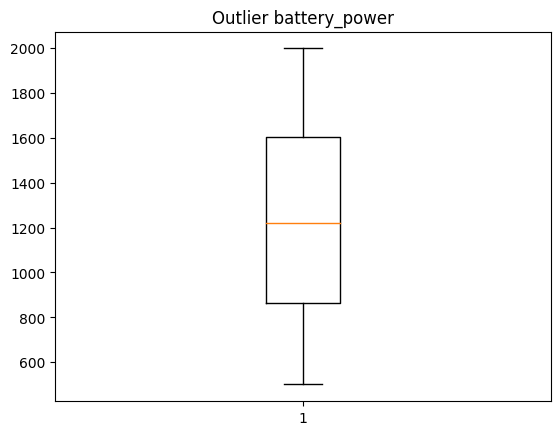

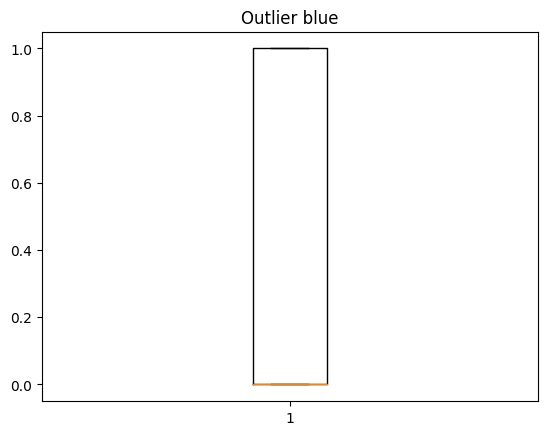

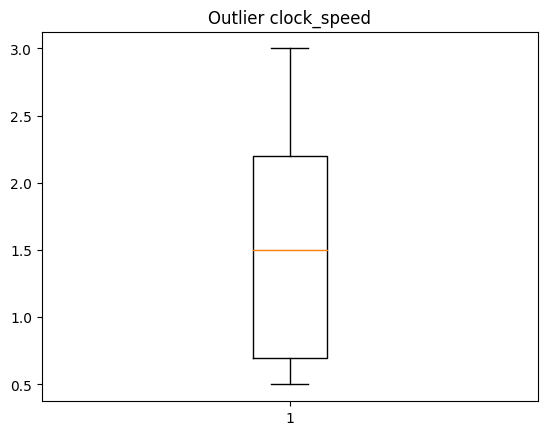

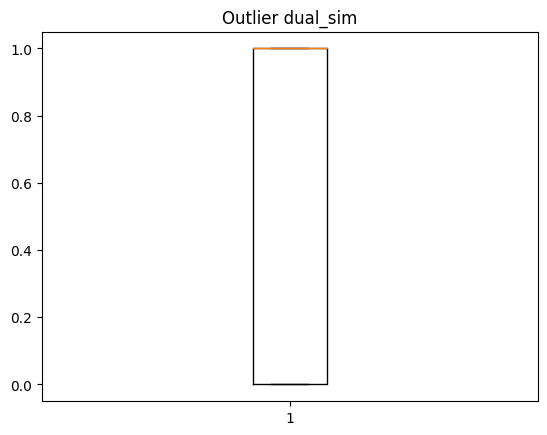

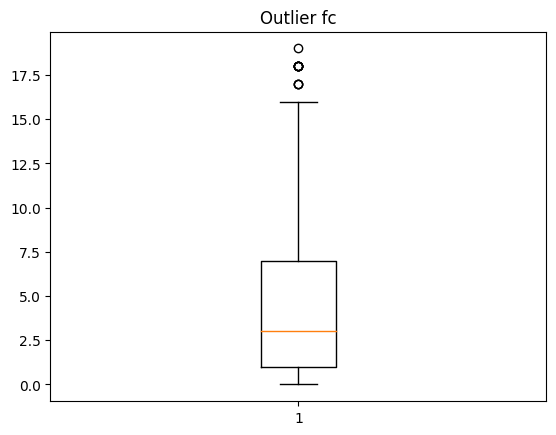

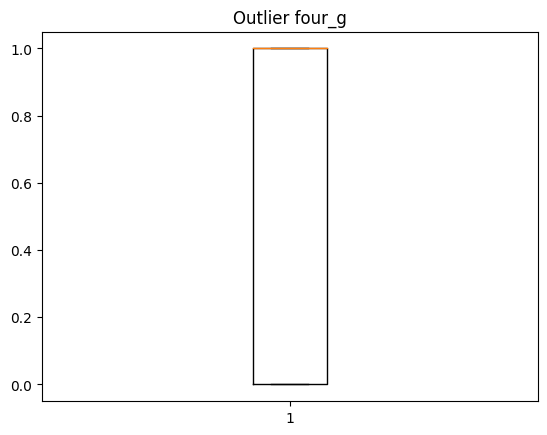

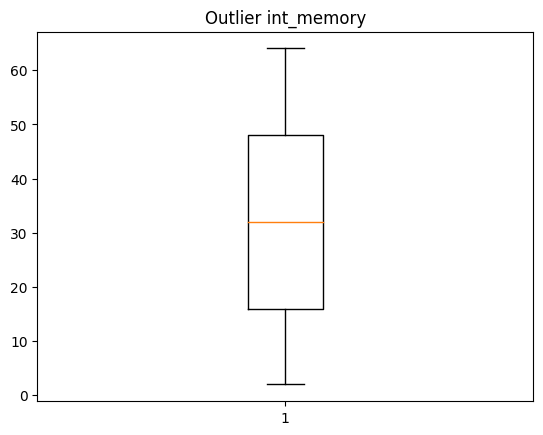

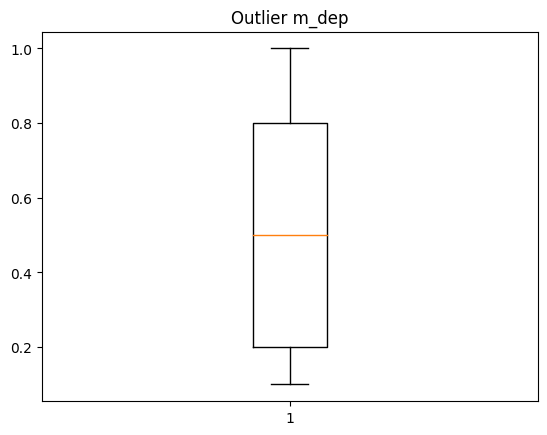

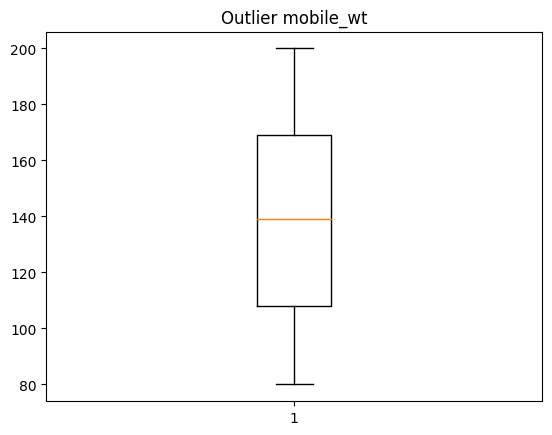

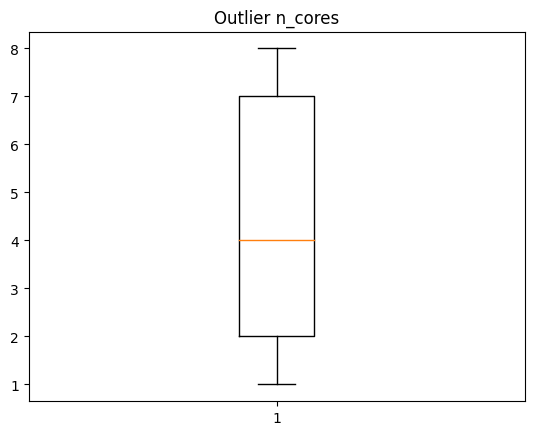

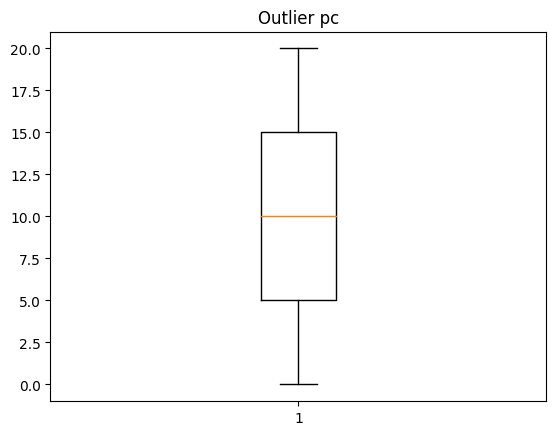

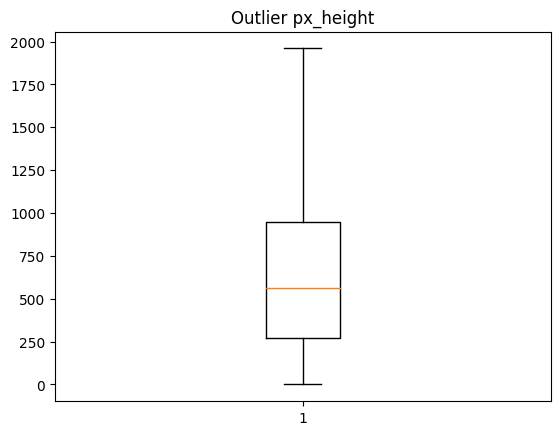

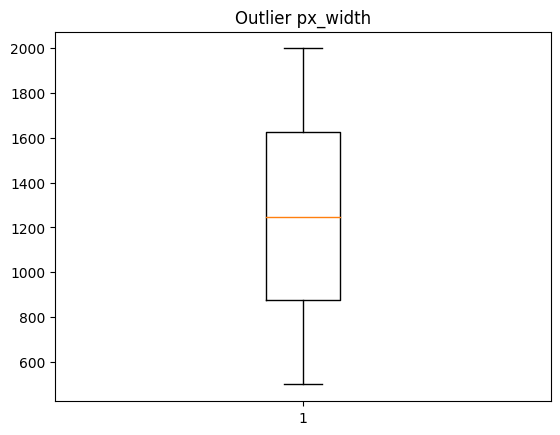

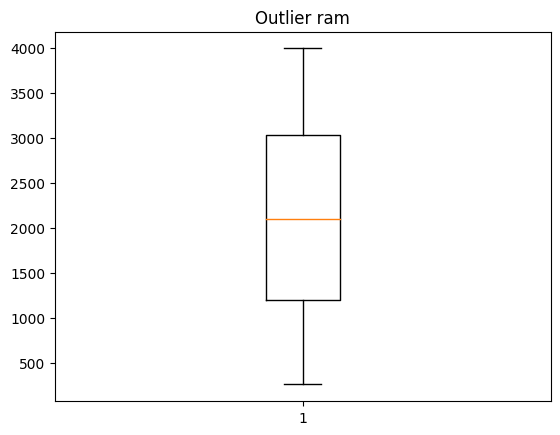

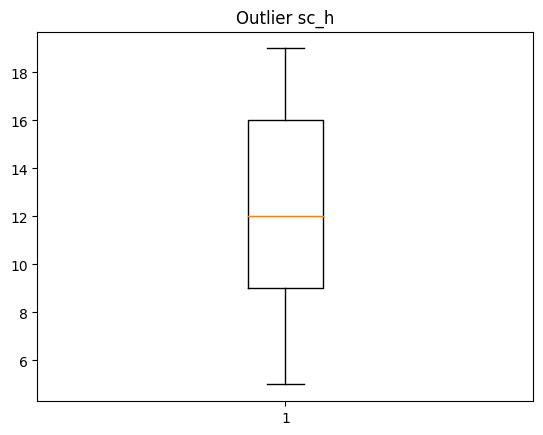

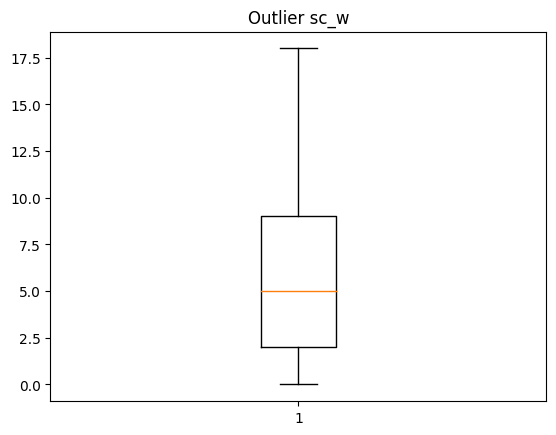

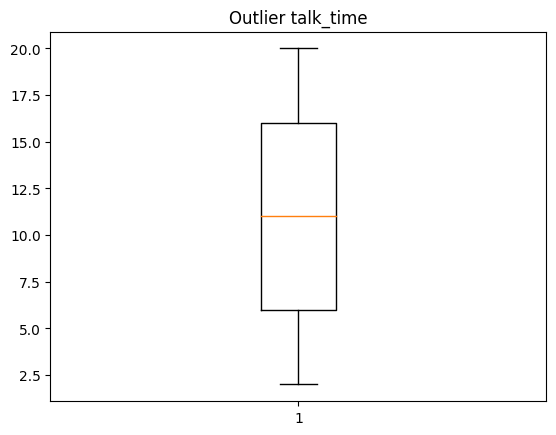

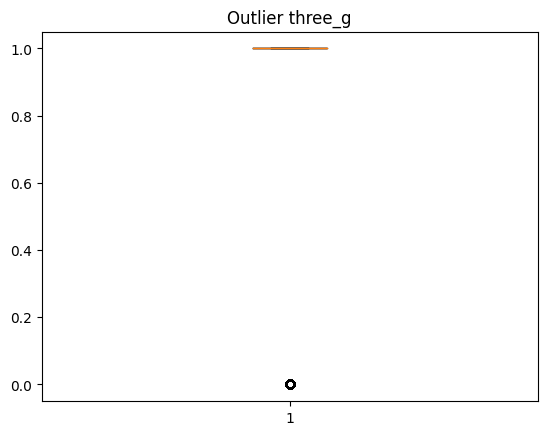

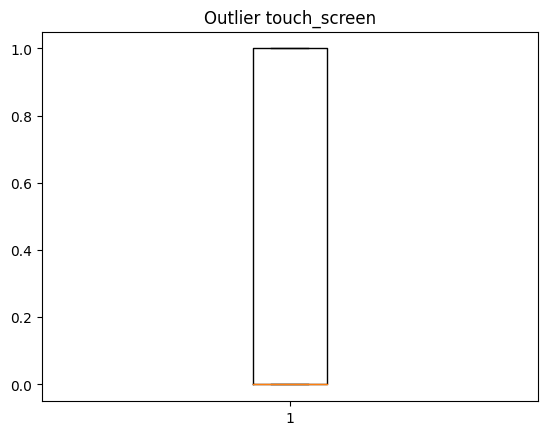

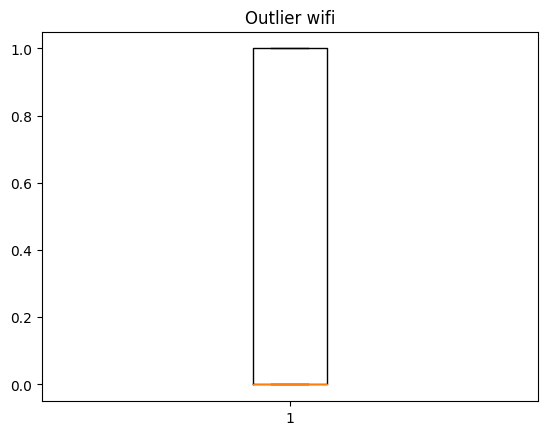

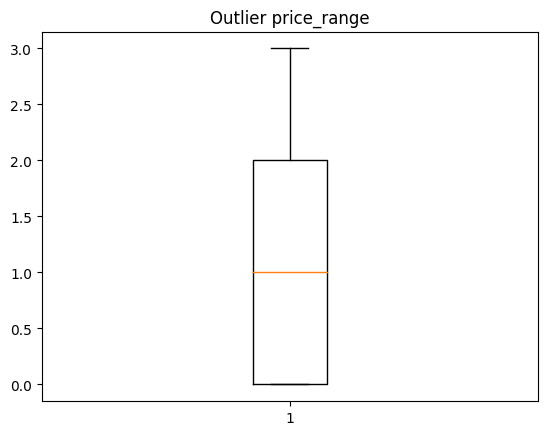

In [12]:
# show outliers by showing diagram using matplotlib for each column
import matplotlib.pyplot as plt

# Iterate over each column in the dataframe
for column in df1.columns:
    # Create a boxplot for the current column
    plt.boxplot(df1[column])
    plt.title(f"Outlier {column}")
    plt.show()

<h3>Analisis:</h3><br>
Lorem ipsum dolo si amet

```
```
***
```
```

<h2>5. Menampilkan distribusi data (plot dan analisis kurtosis) untuk data numerik dan histogram untuk data non-numerik</h2>

<h3> Penentuan data numerik atau non-numerik</h3>

In [65]:
# Menampilkan semua data yang ada pada tabel
print(df1)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               804     1          0.8         1  12       1          41   
1              1042     0          2.2         0  15       1          11   
2              1481     1          2.0         1   0       0          35   
3              1104     0          1.7         0   1       1          60   
4               652     0          0.5         1   1       0          58   
...             ...   ...          ...       ...  ..     ...         ...   
1395            536     1          1.4         0   0       1          53   
1396           1097     0          0.8         0  10       1          21   
1397           1179     1          0.5         0   7       1          32   
1398            719     1          0.5         1   0       1          23   
1399           1439     0          0.9         0  12       1          20   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

<h3>Analisis data:</h3><br>
Untuk data yang bersifat numerik, data yang ada akan memiliki nilai sebaran angka yang tidak beraturan dan bersifat kualitatif. Sedangkan, untuk data yang bersifat non-numerik, data bersifat boolean dan hanya memiliki representasi nilai antara 0 dan 1 saja dengan 0 menyatakan nilai False dan 1 menyatakan nilai True.

Berdasarkan deskripsi kolom yang disebutkan diawal dan hasil tampilan dari data ini, maka pembagian antara kolom yang bersifat numerik dan non-numerik adalah sebagai berikut:

Kolom numerik:
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
Kolom non-numerik: ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

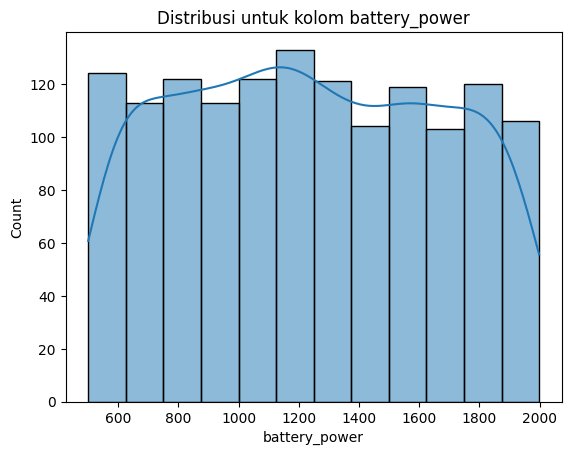

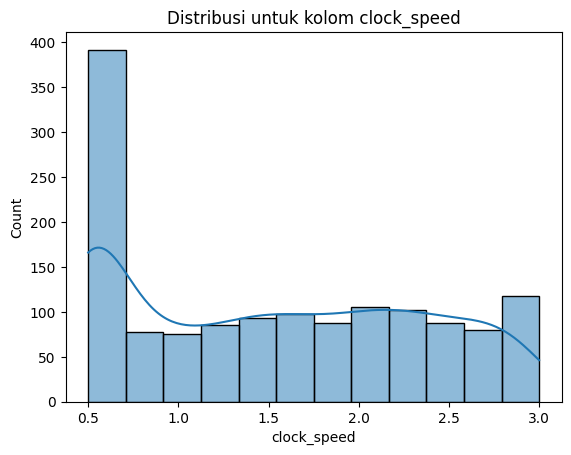

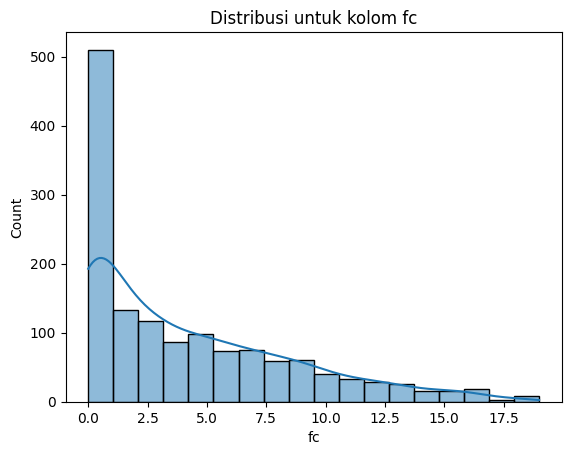

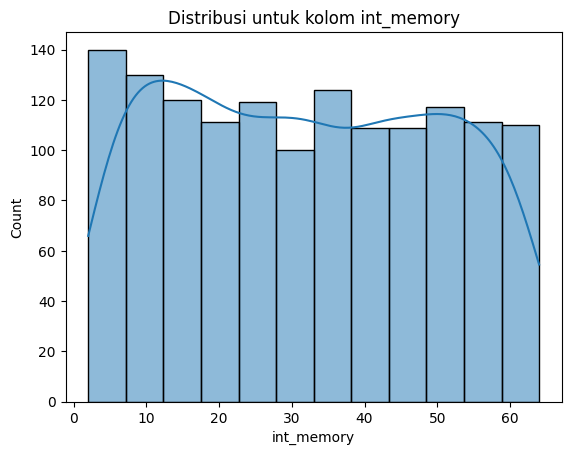

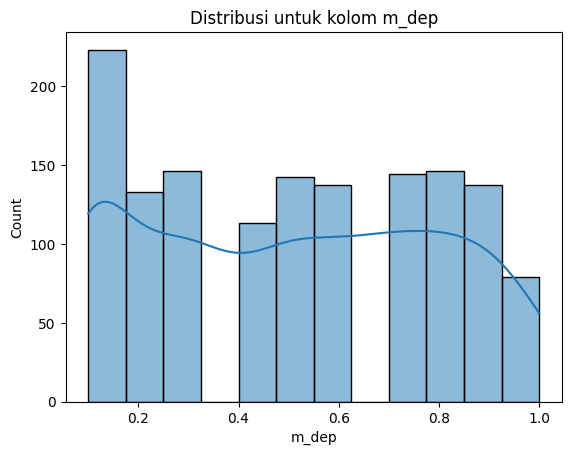

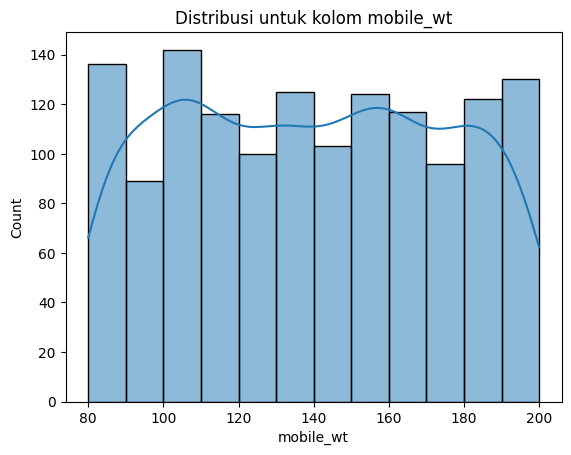

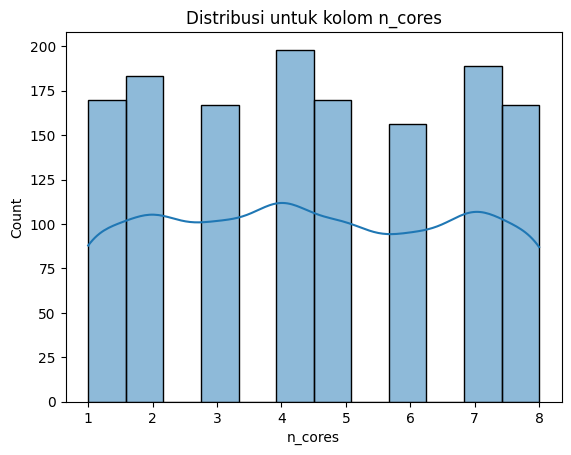

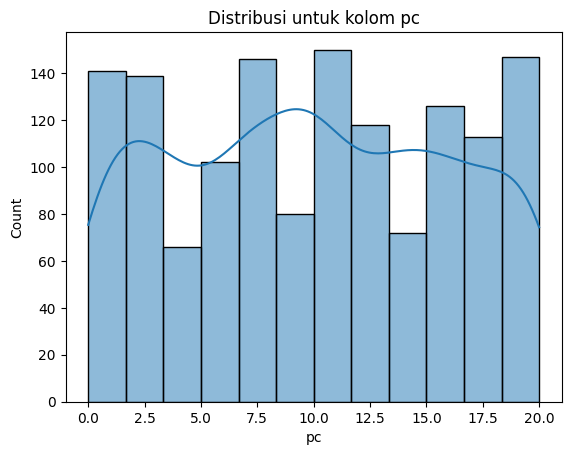

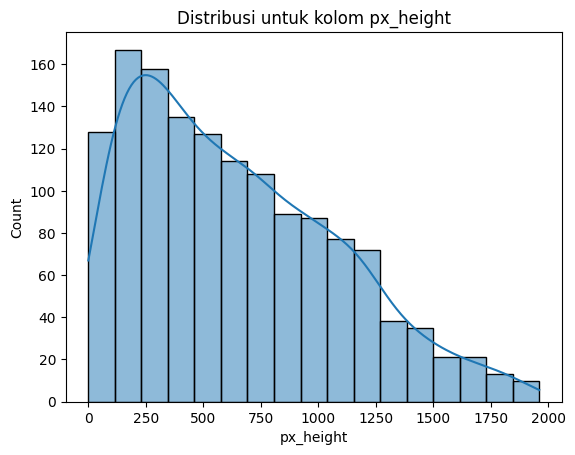

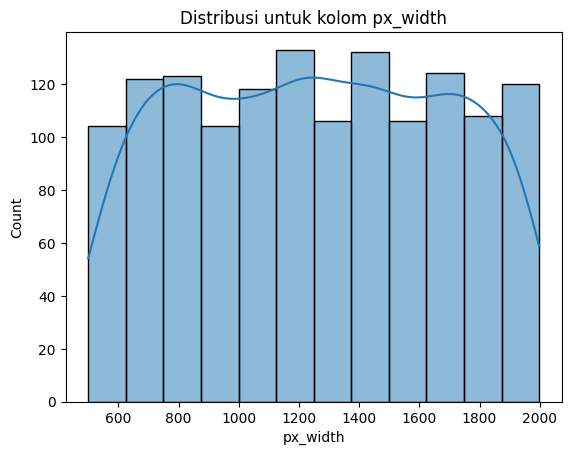

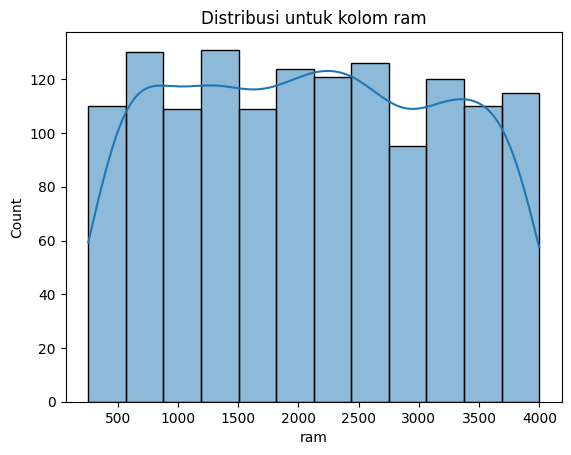

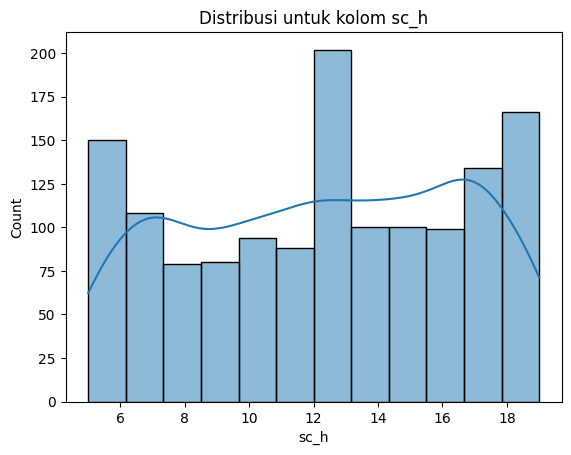

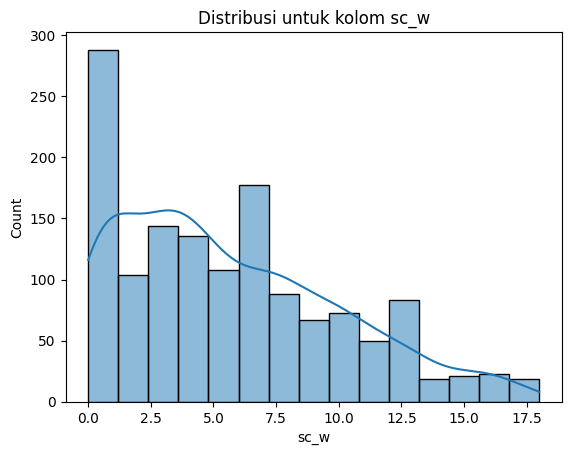

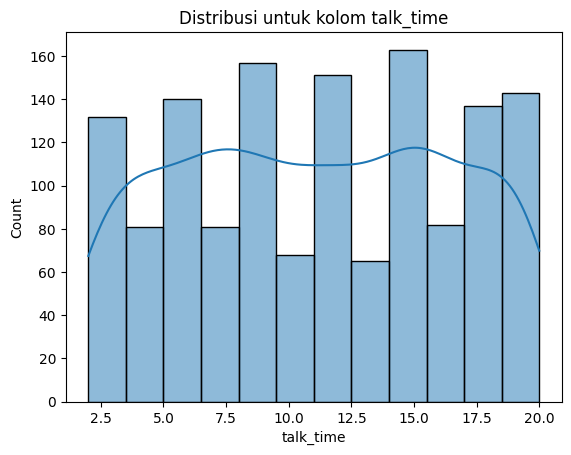

In [23]:
# Pengelompokan kolom
numerics = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Untuk kolom numerik: distribusi data (plot dan analisis kurtosis)
import seaborn as sns
import matplotlib.pyplot as plt

# Iterasi untuk tampilan distribusi
for column in numerics:
    # Distribusi plot dari kolom
    sns.histplot(data=df1, x=column, kde=True)
    plt.title(f"Distribusi untuk kolom {column}")
    plt.show()

#     # Calculate the kurtosis of the current column
#     kurtosis = df1.kurtosis()
#     print(f"Kurtosis of {column}: {kurtosis}")

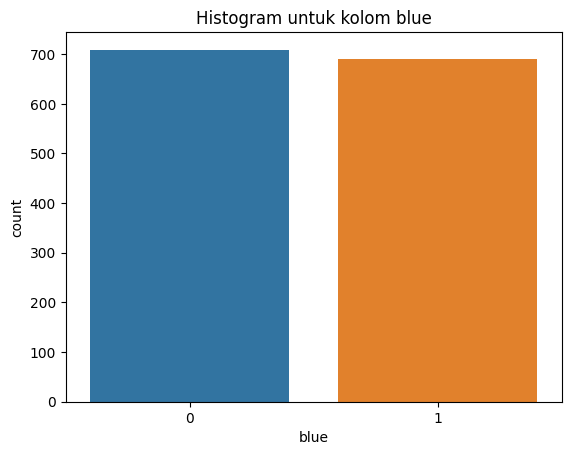

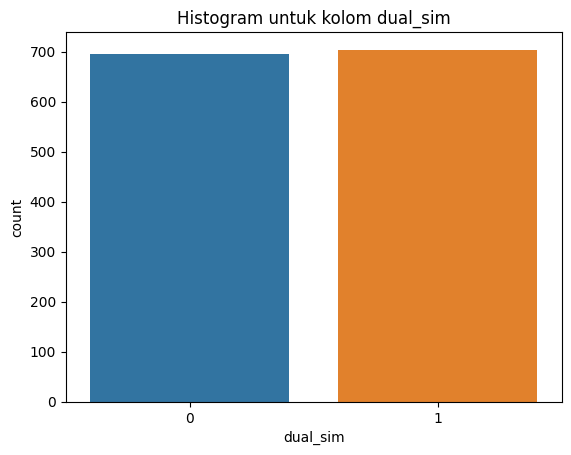

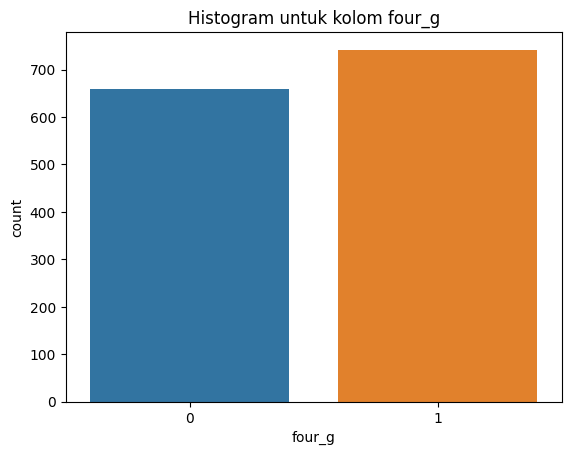

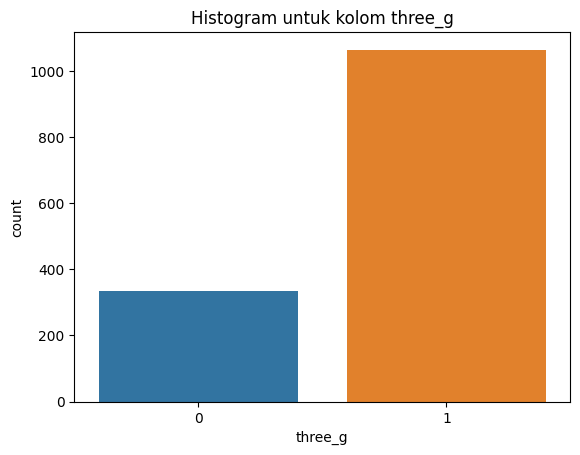

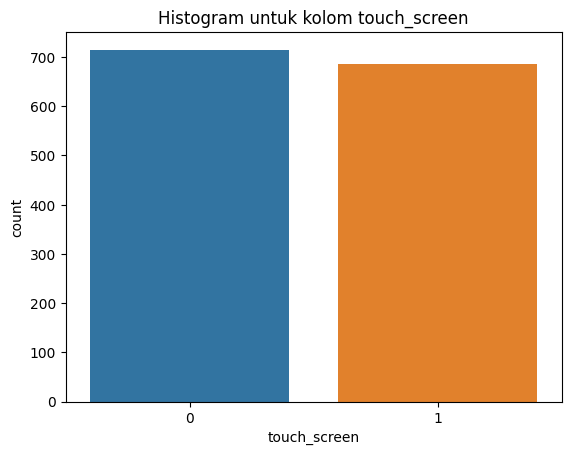

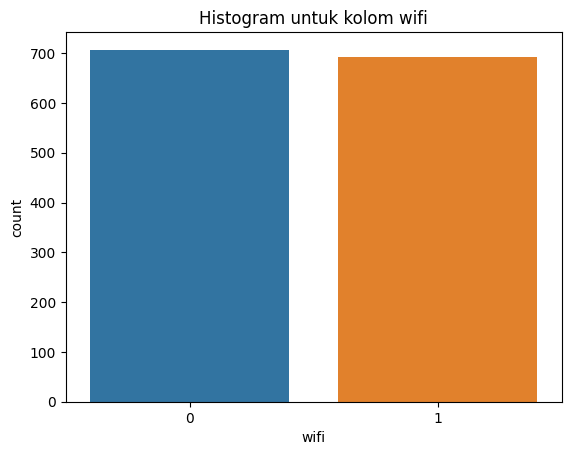

In [30]:
non_numerics = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

# Untuk kolom non numerik: histogram
# Iterasi untuk tampilan histogram
for column in non_numerics:
    sns.countplot(data=df1, x=column)
    plt.title(f"Histogram untuk kolom {column}")
    plt.show()

<h3>Analisis distribusi data:</h3><br>
Lorem ipsum dolo si amet

```
```
***
```
```

<h2>6. Menampilkan Korelasi dengan kolom target</h2>

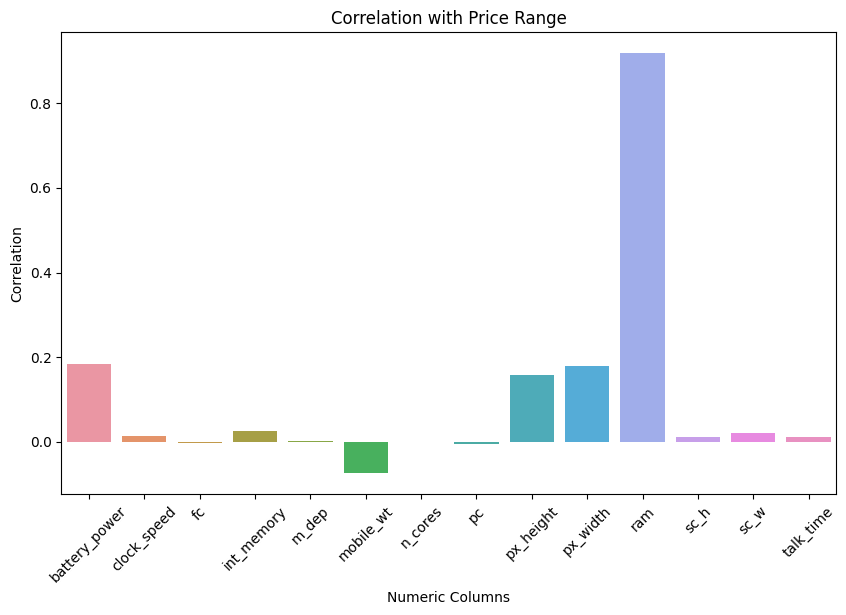

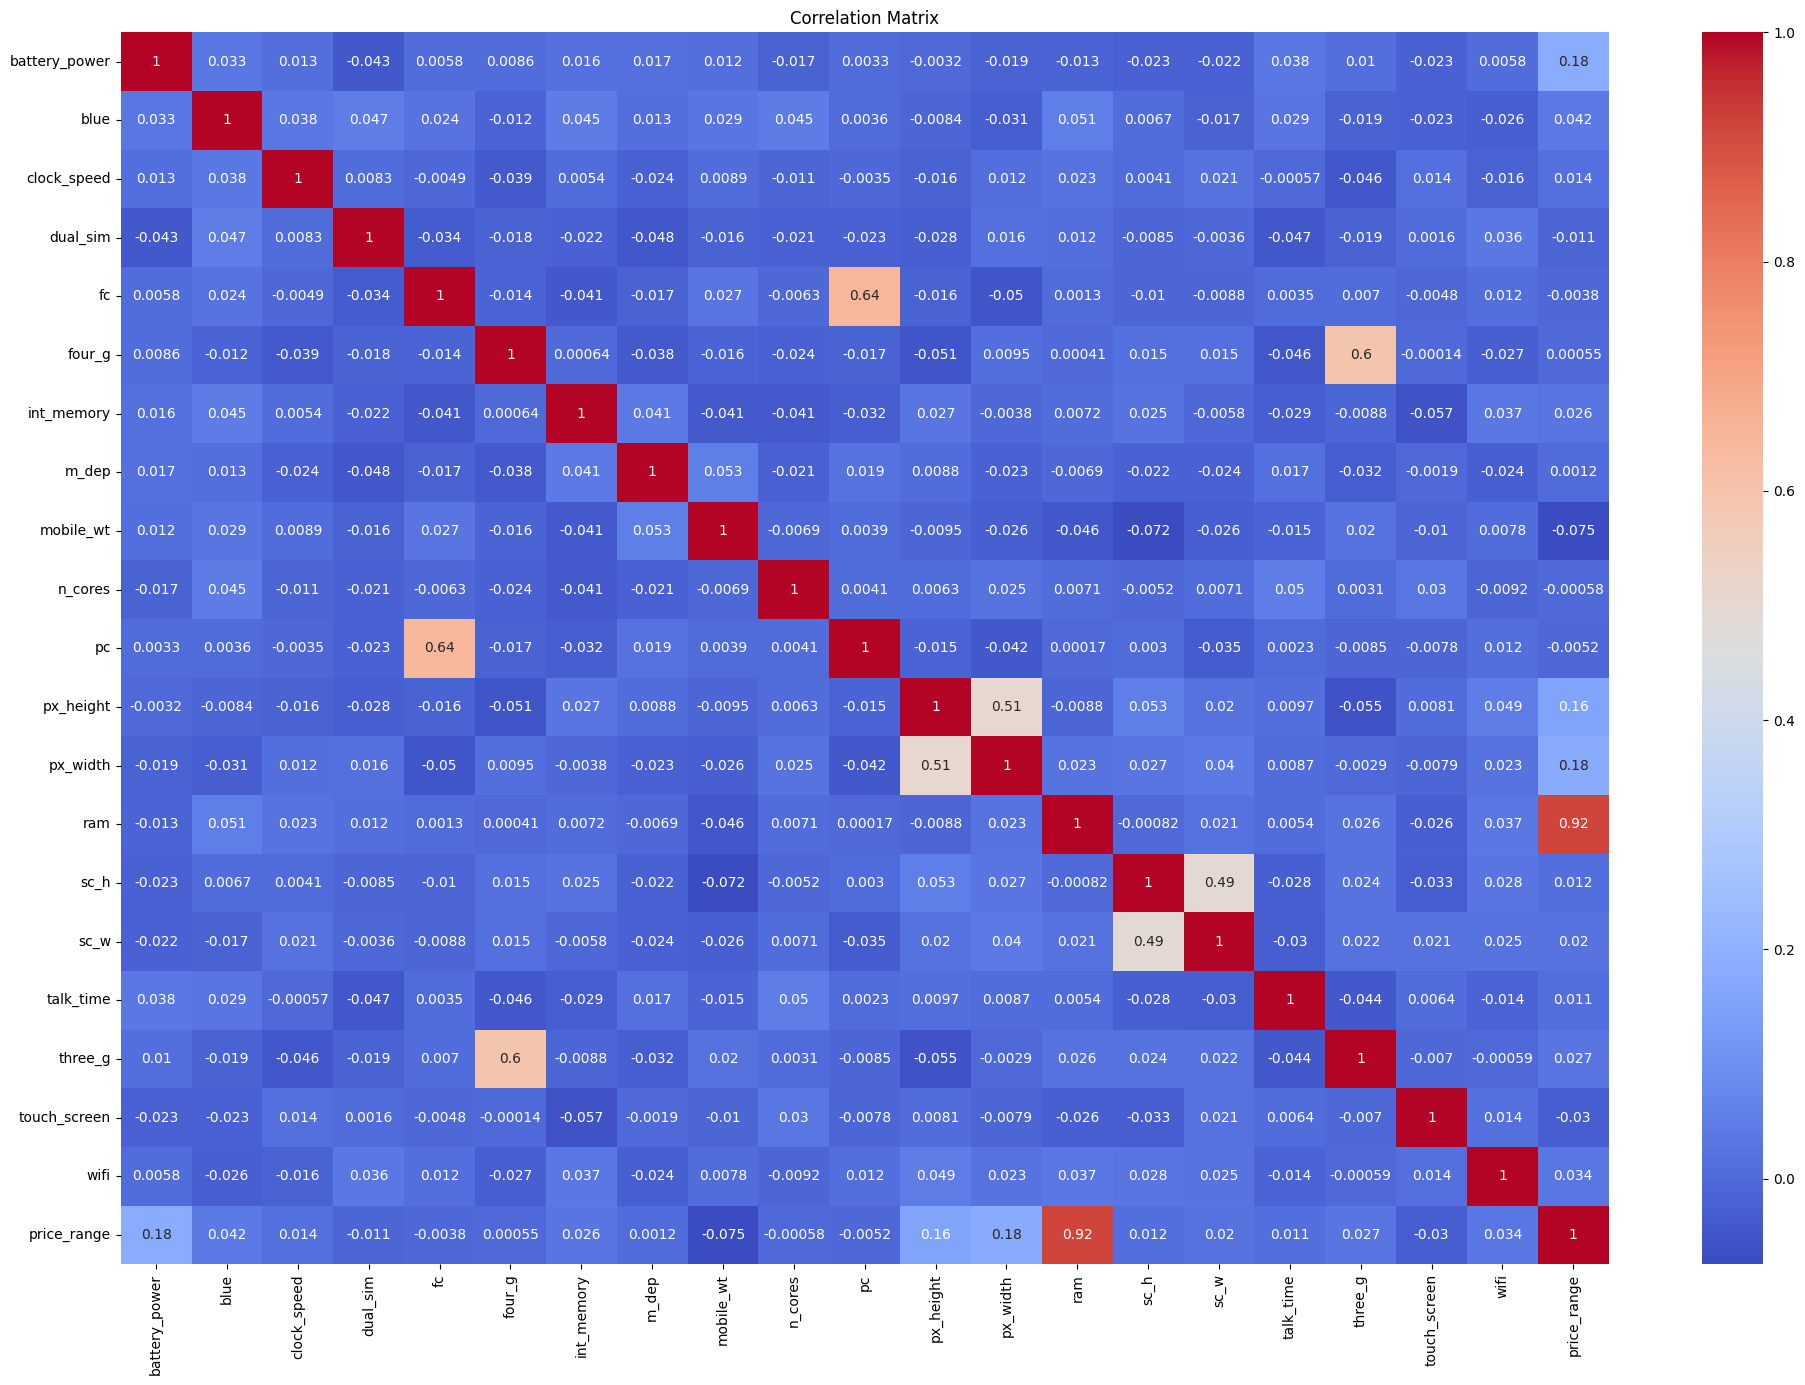

In [16]:
# buat diagram korelasi dengan target adalah kolom price_range untuk setiap kolom

# Calculate the correlation between each numeric column and the target column (price_range)
correlation = df[numerics].corrwith(df['price_range'])

# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title("Correlation with Price Range")
plt.xlabel("Numeric Columns")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.show()

#buat korelasi matrix
# Create correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()